# US Births 2018 Dataset: Predicting Birth Weight
## Introduction
This project analyzes the **US Births 2018 Dataset** to predict **birth weight** based on parental, demographic, and healthcare factors. The project involves:
- Exploratory Data Analysis (EDA) to understand the dataset.
- Building a regression model to predict birth weight.
- Conducting error analysis to evaluate the model's performance.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import os

# Data anlysis

### Load Dataset


In [38]:
data_path = "data/US_births(2018).csv"  # Path to your dataset
data = pd.read_csv(data_path)

C:\Users\Danielle\AppData\Local\Temp\ipykernel_17996\4151276775.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


###  Column Renaming


In [39]:


# Column Renaming
column_mapping = {
    'ATTEND': 'Attendant at Birth',
    'BFACIL': 'Birth Place',
    'BMI': 'Body Mass Index',
    'CIG_0': 'Cigarettes Before Pregnancy',
    'DBWT': 'Birth Weight',
    'DLMP_MM': 'Last Normal Menses Month',
    'DLMP_YY': 'Last Normal Menses Year',
    'DMAR': 'Marital Status',
    'DOB_MM': 'Birth Month',
    'DOB_TT': 'Time of Birth',
    'DOB_WK': 'Birth Day of Week',
    'DOB_YY': 'Birth Year',
    'DWgt_R': 'Delivery Weight',
    'FAGECOMB': 'Father’s Combined Age',
    'FEDUC': 'Father’s Education',
    'FHISPX': 'Father’s Hispanic Origin',
    'FRACE15': 'Father’s Race Recode 15',
    'FRACE31': 'Father’s Race Recode 31',
    'FRACE6': 'Father’s Race Recode 6',
    'ILLB_R': 'Interval Since Last Live Birth Recode',
    'ILOP_R': 'Interval Since Last Other Pregnancy Recode',
    'ILP_R': 'Interval Since Last Pregnancy Recode',
    'IMP_SEX': 'Imputed Sex',
     'IP_GON': 'Gonorrhea (Infections Present)',
    'LD_INDL': 'Induction of Labor',
    'MAGER': 'Mother’s Single Years of Age',
    'MAGE_IMPFLG': 'Mother’s Age Imputed',
    'MAR_IMP': 'Mother’s Marital Status Imputed',
    'MBSTATE_REC': 'Mother’s Nativity',
    'MEDUC': 'Mother’s Education',
    'MHISPX': 'Mother’s Hispanic Origin',
    'MM_AICU': 'Admit to Intensive Care',
    'MRACE15': 'Mother’s Race Recode 15',
    'MRACE31': 'Mother’s Race Recode 31',
    'MRACEIMP': 'Mother’s Race Imputed Flag',
    'MRAVE6': 'Mother’s Race Recode 6',
    'MTRAN': 'Mother Transferred',
    'M_Ht_In': 'Mother’s Height in Total Inches',
    'NO_INFEC': 'No Infections Reported',
    'NO_MMORB': 'No Maternal Morbidity Reported',
    'NO_RISKS': 'No Risk Factors Reported',
    'PAY': 'Payment Source for Delivery',
    'PAY_REC': 'Payment Recode',
    'PRECARE': 'Month Prenatal Care Began',
    'PREVIS': 'Number of Prenatal Visits',
    'PRIORDEAD': 'Prior Births Now Dead',
    'PRIORLIVE': 'Prior Births Now Living',
    'PRIORTERM': 'Prior Other Terminations',
    'PWgt_R': 'Pre-pregnancy Weight Recode',
    'RDMETH_REC': 'Delivery Method Recode',
    'RESTATUS': 'Residence Status',
    'RF_CESAR': 'Previous Cesarean',
    'RF_CESARN': 'Number of Previous Cesareans',
    'SEX': 'Sex of Infant',
    'WTGAIN': 'Weight Gain'
}
data.rename(columns=column_mapping, inplace=True)



### Data Overview


In [40]:
print("Dataset Shape:", data.shape)
print("First 5 Rows:")
print(data.head())

Dataset Shape: (3801534, 55)
First 5 Rows:
   Attendant at Birth  Birth Place  Body Mass Index  \
0                   1            1             30.7   
1                   1            1             33.3   
2                   1            1             30.0   
3                   3            1             23.7   
4                   1            1             35.5   

   Cigarettes Before Pregnancy  Birth Weight  Last Normal Menses Month  \
0                            0          3657                         4   
1                            2          3242                        99   
2                            0          3470                         4   
3                            0          3140                         5   
4                            0          2125                        99   

   Last Normal Menses Year Marital Status  Birth Month  Time of Birth  ...  \
0                     2017              1            1           1227  ...   
1                     999

### Identify Numerical and Categorical Columns


In [41]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nNumerical Columns:", numerical_columns)
print("\nCategorical Columns:", categorical_columns)



Numerical Columns: ['Attendant at Birth', 'Birth Place', 'Body Mass Index', 'Cigarettes Before Pregnancy', 'Birth Weight', 'Last Normal Menses Month', 'Last Normal Menses Year', 'Birth Month', 'Time of Birth', 'Birth Day of Week', 'Birth Year', 'Delivery Weight', 'Father’s Combined Age', 'Father’s Education', 'Father’s Hispanic Origin', 'Father’s Race Recode 15', 'Father’s Race Recode 31', 'Father’s Race Recode 6', 'Interval Since Last Live Birth Recode', 'Interval Since Last Other Pregnancy Recode', 'Interval Since Last Pregnancy Recode', 'Mother’s Single Years of Age', 'Mother’s Nativity', 'Mother’s Education', 'Mother’s Hispanic Origin', 'Mother’s Race Recode 15', 'Mother’s Race Recode 31', 'Mother’s Race Recode 6', 'Mother’s Height in Total Inches', 'No Infections Reported', 'No Maternal Morbidity Reported', 'No Risk Factors Reported', 'Payment Source for Delivery', 'Payment Recode', 'Month Prenatal Care Began', 'Number of Prenatal Visits', 'Prior Births Now Dead', 'Prior Births N

### Categorical Encoding

In [43]:
# Explain encoding decisions
print("\nEncoding Categorical Columns:")
encoded_columns = {}


Encoding Categorical Columns:


In [44]:
# Binary columns - Label Encoding
binary_columns = ['Marital Status', 'Imputed Sex', 'Previous Cesarean', 'Sex of Infant']
for col in binary_columns:
    print(f"Label encoding {col}")
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))
    encoded_columns[col] = 'Label Encoding'

Label encoding Marital Status
Label encoding Imputed Sex
Label encoding Previous Cesarean
Label encoding Sex of Infant


In [45]:
# Nominal columns - One-Hot Encoding
nominal_columns = ['Gonorrhea (Infections Present)', 'Induction of Labor', 'Mother Transferred']
for col in nominal_columns:
    print(f"One-hot encoding {col}")
    one_hot = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, one_hot], axis=1)
    data.drop(columns=[col], inplace=True)
    encoded_columns[col] = 'One-Hot Encoding'

One-hot encoding Gonorrhea (Infections Present)
One-hot encoding Induction of Labor
One-hot encoding Mother Transferred


In [46]:
flag_columns = ['Mother’s Age Imputed', 'Mother’s Marital Status Imputed', 'Mother’s Race Imputed Flag']
for col in flag_columns:
    print(f"Label encoding {col}")
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))
    encoded_columns[col] = 'Label Encoding'

Label encoding Mother’s Age Imputed
Label encoding Mother’s Marital Status Imputed
Label encoding Mother’s Race Imputed Flag


In [47]:
print("\nEncoding Summary:")
for col, method in encoded_columns.items():
    print(f"{col}: {method}")


Encoding Summary:
Marital Status: Label Encoding
Imputed Sex: Label Encoding
Previous Cesarean: Label Encoding
Sex of Infant: Label Encoding
Gonorrhea (Infections Present): One-Hot Encoding
Induction of Labor: One-Hot Encoding
Mother Transferred: One-Hot Encoding
Mother’s Age Imputed: Label Encoding
Mother’s Marital Status Imputed: Label Encoding
Mother’s Race Imputed Flag: Label Encoding


### Handling Missing Data


In [48]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


# Visualizations

### Visualization 1: Birth Weight by Sex of Infant
Explanation: This plot shows the distribution of birth weights grouped by the sex of the infant. It helps us understand if there are any differences in birth weight between male and female infants, which could be relevant to predicting the target variable.



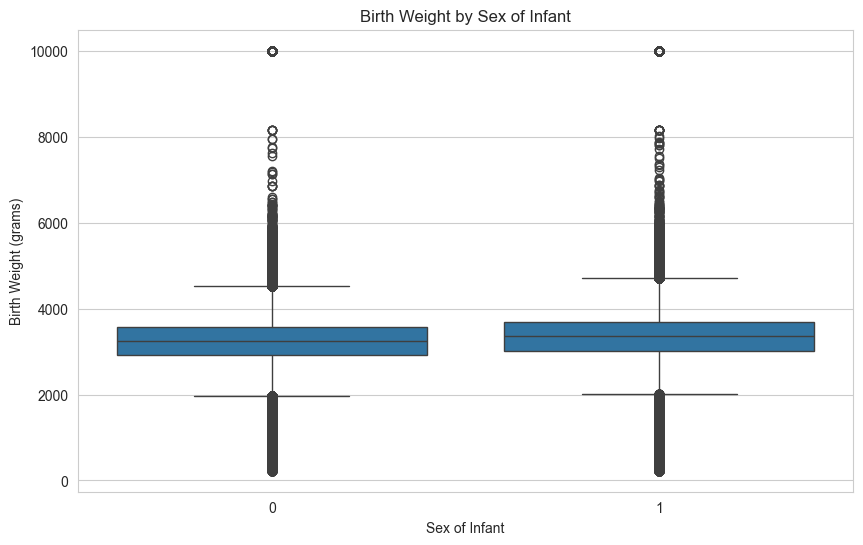

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex of Infant', y='Birth Weight', data=data)
plt.title("Birth Weight by Sex of Infant")
plt.xlabel("Sex of Infant")
plt.ylabel("Birth Weight (grams)")
plt.show()


### Visualization 2: Birth Weight by Marital Status
 Explanation: This visualization explores how the marital status of the mother affects birth weight. Understanding this relationship could highlight potential socio-economic or health-related factors influencing birth weight.


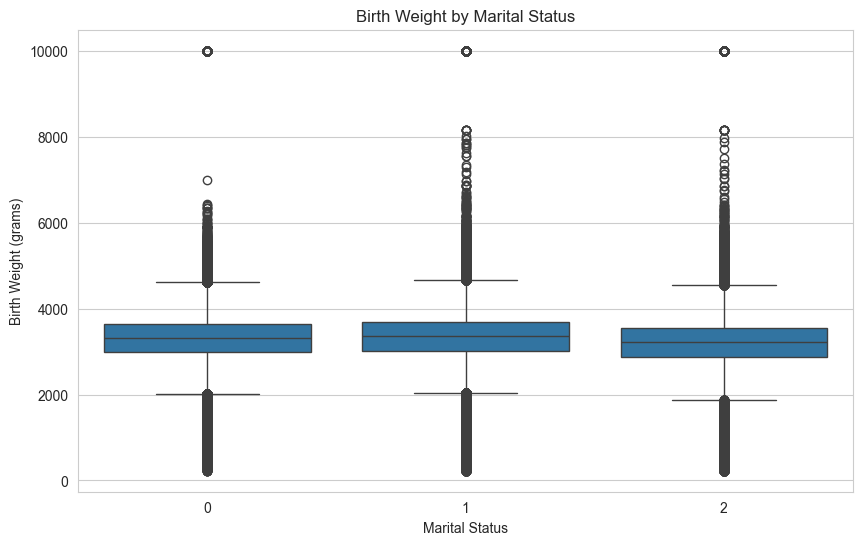

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital Status', y='Birth Weight', data=data)
plt.title("Birth Weight by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Birth Weight (grams)")
plt.show()

### Visualization 3: Correlation of Features with Birth Weight
 Explanation: This bar plot shows the correlation of numerical features with the target variable (Birth Weight).



Numerical columns used for correlation: ['Attendant at Birth', 'Birth Place', 'Body Mass Index', 'Cigarettes Before Pregnancy', 'Birth Weight', 'Last Normal Menses Month', 'Last Normal Menses Year', 'Birth Month', 'Time of Birth', 'Birth Day of Week', 'Birth Year', 'Delivery Weight', 'Father’s Combined Age', 'Father’s Education', 'Father’s Hispanic Origin', 'Father’s Race Recode 15', 'Father’s Race Recode 31', 'Father’s Race Recode 6', 'Interval Since Last Live Birth Recode', 'Interval Since Last Other Pregnancy Recode', 'Interval Since Last Pregnancy Recode', 'Mother’s Single Years of Age', 'Mother’s Nativity', 'Mother’s Education', 'Mother’s Hispanic Origin', 'Mother’s Race Recode 15', 'Mother’s Race Recode 31', 'Mother’s Race Recode 6', 'Mother’s Height in Total Inches', 'No Infections Reported', 'No Maternal Morbidity Reported', 'No Risk Factors Reported', 'Payment Source for Delivery', 'Payment Recode', 'Month Prenatal Care Began', 'Number of Prenatal Visits', 'Prior Births Now De

C:\Users\Danielle\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Danielle\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


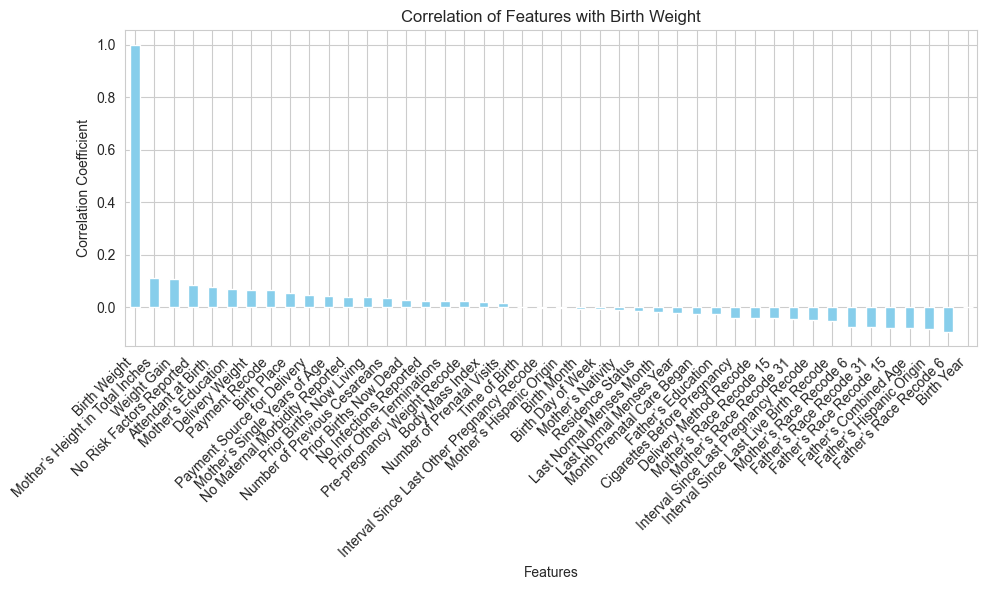

In [56]:
# Visualization 3: Correlation of Features with Birth Weight
# Explanation: This bar plot shows the correlation of numerical features with the target variable (Birth Weight).
print("Numerical columns used for correlation:", numerical_columns)

# Filter only numerical features and compute correlations with Birth Weight
correlation_with_target = data[numerical_columns].corrwith(data['Birth Weight']).sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Birth Weight")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Visualization 4: Distribution of Birth Weight
 Explanation: This histogram reveals the overall distribution of birth weights in the dataset. The plot helps identify the range, central tendency, and any outliers in the target variable.


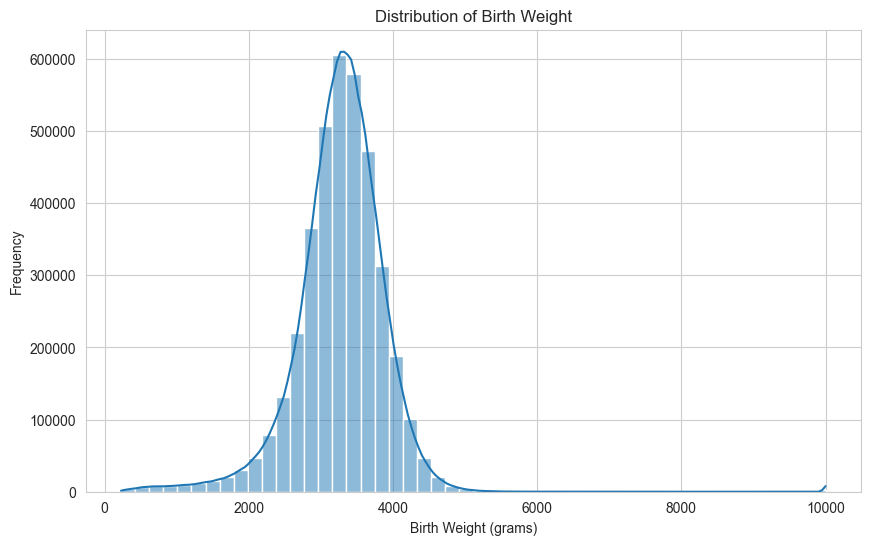

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Birth Weight'], bins=50, kde=True)
plt.title("Distribution of Birth Weight")
plt.xlabel("Birth Weight (grams)")
plt.ylabel("Frequency")
plt.show()

# Visualization 5: Mother’s Age vs Birth Weight
Explanation: This scatter plot examines the relationship between the mother's age and birth weight, using marital status as a hue to uncover potential subgroup differences. This visualization aids in identifying trends or patterns that may affect birth weight.


C:\Users\Danielle\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


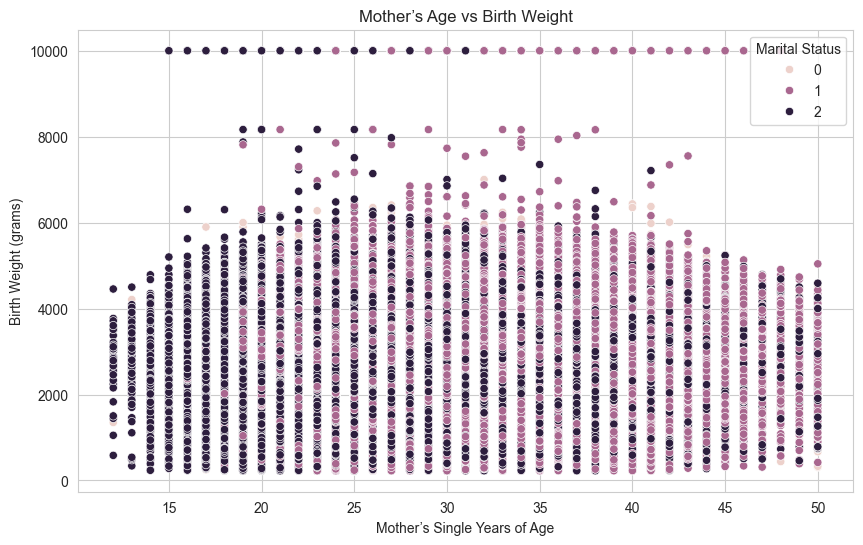

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mother’s Single Years of Age', y='Birth Weight', hue='Marital Status', data=data)
plt.title("Mother’s Age vs Birth Weight")
plt.xlabel("Mother’s Single Years of Age")
plt.ylabel("Birth Weight (grams)")
plt.legend(title="Marital Status")
plt.show()


# Further Analysis: Insights from Visualizations
### Explanation: Based on the above visualizations, we can observe the following:
 1. The distribution of Birth Weight is approximately normal, with a peak around 3,000 to 4,000 grams, as shown in the histogram. This normal distribution suggests that the dataset is not heavily skewed, and typical statistical analyses will be appropriate.
 2. From the correlation bar plot, the strongest predictors of Birth Weight include Mother’s Height, Weight Gain, and the absence of risk factors (e.g., 'No Risk Factors Reported'). These predictors can be prioritized for inclusion in modeling efforts.
 3. The boxplot of Birth Weight by Sex of Infant shows that there are slight but meaningful differences between male and female infants, suggesting that Sex may be a useful categorical predictor in a model.
 4. Marital Status shows a moderate effect on Birth Weight, as observed in the boxplot. This could indicate an indirect influence, possibly through socio-economic or healthcare access factors.
 5. The scatterplot between Mother’s Age and Birth Weight shows a subtle positive trend, indicating that older mothers tend to have slightly higher birth weights. However, the scatterplot also highlights considerable variation, suggesting that other factors interact with age.

### Additional Observations:
 - The correlation heatmap highlights that some features, such as 'Mother’s Height in Total Inches' and 'Weight Gain', have moderate positive correlations with Birth Weight. These features likely capture physical and health-related factors contributing to birth weight.
 - The histogram and scatter plots suggest outliers in the data, such as unusually high or low birth weights. These may need further investigation to confirm their validity or understand underlying causes.
 - Categorical predictors like Marital Status and Sex of Infant show meaningful group-level differences, highlighting their relevance in predictive modeling.
 - Variability in the scatterplot of Mother’s Age and Birth Weight indicates that this relationship is influenced by additional factors, suggesting potential feature interactions to explore in a model.

 Overall, the visualizations provide strong guidance for feature selection and preprocessing, as well as potential interactions to consider in model development.


# Part 3: Basic Model Pipeline

#### Prepare Features and Target for Modeling

In [58]:
X = data.drop(columns=['Birth Weight'])
y = data['Birth Weight']

#### Ensure all categorical columns are properly encoded for XGBoost

In [64]:
for col in X.select_dtypes(include=['object']).columns:
    print(f"Encoding column {col}")
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))


#### Train-Test Split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Basic Model Pipeline
 Explanation: Here we use an XGBoost Regressor as the basic model. This serves as a starting point for future improvements.


In [66]:
print("\nTraining Basic XGBoost Model...")
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100, max_depth=3)
xgb_model.fit(X_train, y_train)


Training Basic XGBoost Model...


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### Model Predictions

In [73]:
print("\nEvaluating Basic Model...")
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Calculate Correlation Between Test Labels and Predictions
correlation_test_pred = np.corrcoef(y_test, y_pred)[0, 1]
print(f"Correlation between Actual and Predicted Birth Weights: {correlation_test_pred}")



Evaluating Basic Model...
Root Mean Squared Error (RMSE): 511.29276793137535
Correlation between Actual and Predicted Birth Weights: 0.5659149440398414


## Feature Importance


Feature Importance...


C:\Users\Danielle\AppData\Local\Temp\ipykernel_17996\3516346386.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


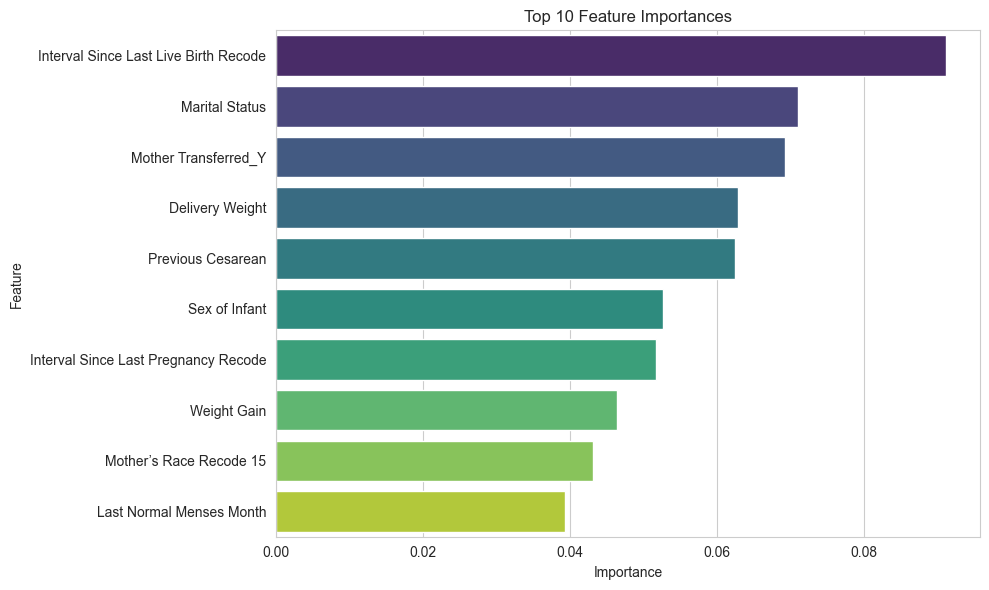

In [72]:
print("\nFeature Importance...")
feature_importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()